In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

/Users/hoang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
          "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
          "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", 
           "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
          "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
          "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", 
           "dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
           "dst_host_same_src_port_rate", "dst_host_srv_dist_host_rate", "dst_host_serror_rate", 
           "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

## Loading data

In [3]:
df = pd.read_csv("../data/kddcup.data", sep=",", names=columns, index_col=None)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_dist_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_dist_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [6]:
df.shape

(4898431, 42)

## Filter out the entire data frame to only include data entries that involve an HTTP attact, and drop the service column.

In [8]:
df = df[df["service"] == "http"]
df = df.drop("service", axis=1)
columns.remove("service")

In [9]:
df.shape

(623091, 41)

In [10]:
df["label"].value_counts()

normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

## Label encoder

Some of the columns have categorical data values, meaning the model will have trouble training on them.

In [11]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_dist_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
print(df.head())

   duration protocol_type flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0           tcp   SF        215      45076     0               0   
1         0           tcp   SF        162       4528     0               0   
2         0           tcp   SF        236       1228     0               0   
3         0           tcp   SF        233       2032     0               0   
4         0           tcp   SF        239        486     0               0   

   urgent  hot  num_failed_logins   ...     dst_host_srv_count  \
0       0    0                  0   ...                      0   
1       0    0                  0   ...                      1   
2       0    0                  0   ...                      2   
3       0    0                  0   ...                      3   
4       0    0                  0   ...                      4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0   

In [13]:
for col in df.columns:
    if df[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(df[col]) # encoded.fit() gives the label encoder all of the data in the col
                             # from which it extracts the unique categorical values from
        df[col] = encoded.transform(df[col]) # assigning the encoded representation of 
                                             # each categorical value to df[col]

In [14]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_dist_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


## Create training, validation, testing data

In [16]:
for f in range(0, 3):
    df = df.iloc[np.random.permutation(len(df))] # randomly shuffling all the entries in the data
    # ...set to avoid the problem of abnormal entries pooling in any one region of the data set.
    
df2 = df[:500000] 
labels = df2["label"]
df_validate = df[500000:]

x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size=0.2, random_state=42)

x_val, y_val = df_validate, df_validate["label"]

## Define the term

. Training data: is the data that the model trains and learns on. 
    - For an isolation forest, this set is what the model partitions on. 
    - For neural networks, this set is what the model adjusts its weights on.

. Testing data: is the data that is used to test the model’s performance. The train_test_split() function basically splits the data into a portion used to train on and a portion used to test the model’s
performance on.

. Validation data: is used during training to gauge how the model’s
training is going. It basically helps ensure that as the model gets
better at performing the task on the training data, it also gets better
at performing the same task over new, but similar data. This way,
the model doesn’t only get really good at performing the task on the
training data, but can perform similarly on new data as well. In other
words, you want to avoid overfitting, a situation where the model
performs very well on a particular data set, which can be the training
data set, yet the performance noticeably drops when new data is
presented. A slight drop in performance is to be expected when the
model is exposed to new variations in the data, but in this case, it is
more pronounced.

Source: Book - Begining Abnomaly Detection (2019)

In [17]:
print("Shapes: \nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("x_val:%s\ny_val:%s\n" % (x_val.shape, y_val.shape))

Shapes: 
x_train:(400000, 41)
y_train:(400000,)

x_test:(100000, 41)
y_test:(100000,)

x_val:(123091, 41)
y_val:(123091,)



# Buil Isolation Forest Model

In [19]:
IF_model = IsolationForest(n_estimators=100, max_samples=256, contamination=0.1, random_state=42)

In [20]:
IF_model.fit(x_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples=256, n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

## Abnomaly Scores

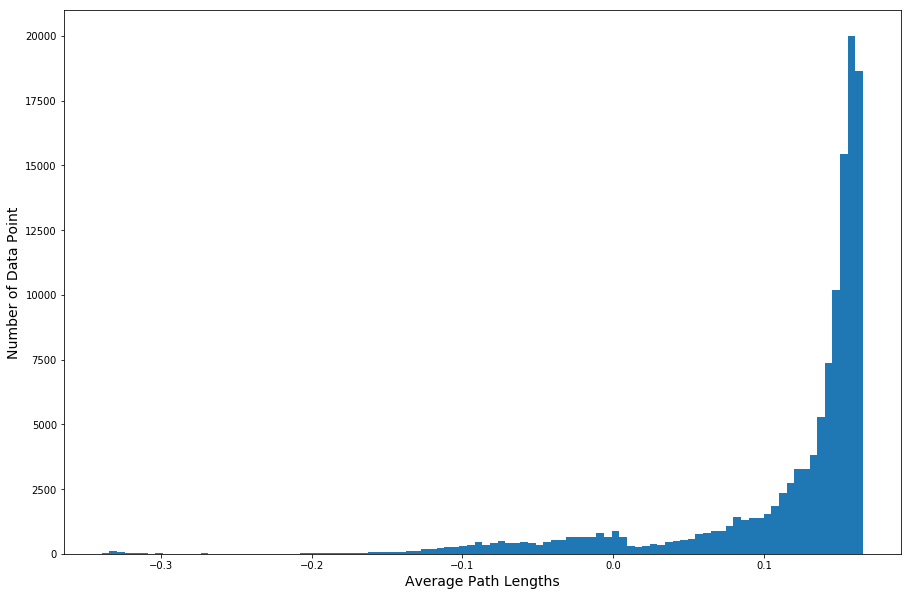

<Figure size 432x288 with 0 Axes>

In [22]:
anomaly_scores = IF_model.decision_function(x_val)

plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Point', fontsize=14)
plt.show()
plt.savefig("../figures/average_path_length_vs_number_of_datapoint.png")
# A histogram plotting the average path lengths for the data points. It helps you to determine
#what is an anomaly by using the shortest set of path lengths, since that indicates that the model
#was able to easily isolate those points

## AUC calculation

In [23]:
from sklearn.metrics import roc_auc_score

anomalies = anomaly_scores > -0.19
matches = y_val == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies, matches)
print("AUC: {:.2%}".format (auc))

AUC: 91.91%


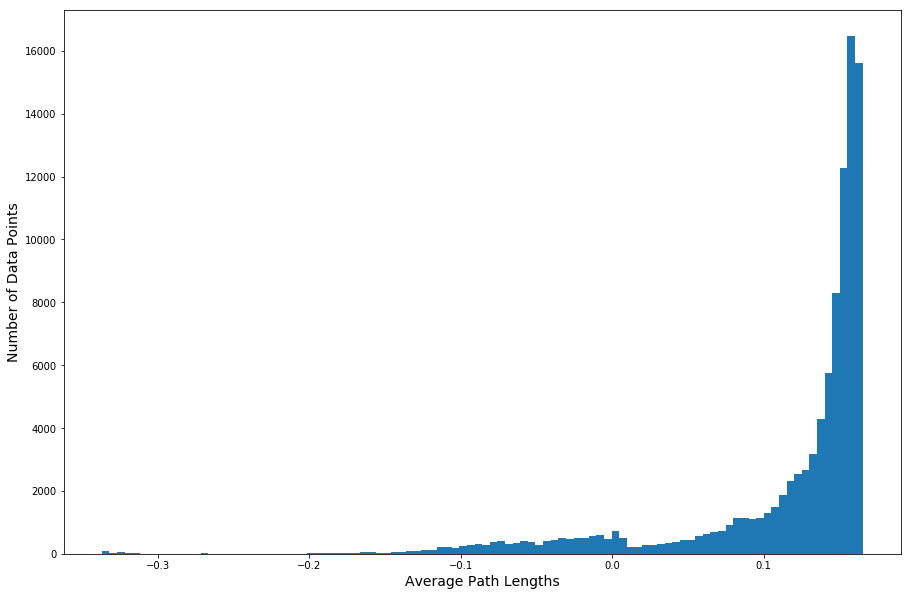

In [24]:
anomaly_scores_test = IF_model.decision_function(x_test)

plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores_test, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()

In [25]:
anomalies_test = anomaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies_test, matches)
print("AUC: {:.2%}".format (auc))

AUC: 94.45%


# Conclusion

It seems to perform very well on both the validation and the test data.

In this lession, we gained a better understanding of what a isolation forest is and how to apply it. IF work well for multi-dimensional data, and can be used for unsupervised anomaly detection when applied in the manner implemented in this section.